In [2]:
from __future__ import print_function, division

import re
import math
import timeit
import numpy as np
print('numpy '+ np.__version__)
import pandas as pd
print ('pandas '+ pd.__version__)
import seaborn as sns
print('seaborn '+ sns.__version__)
import matplotlib.pyplot as plt

%matplotlib inline


numpy 1.10.2
pandas 0.17.1
seaborn 0.6.0


/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
nypd_df = pd.read_csv('data/NYPD_7_Major_Felony_Incidents.csv')
nypd_df.head()

,OBJECTID,Identifier,Occurrence Date,Day of Week,Occurrence Month,Occurrence Day,Occurrence Year,Occurrence Hour,CompStat Month,CompStat Day,CompStat Year,Offense,Offense Classification,Sector,Precinct,Borough,Jurisdiction,XCoordinate,YCoordinate,Location 1
0,11,987726177,01/01/2015 02:51:00 AM,Thursday,Jan,1,2015,200,Jan,1,2015,MURDER,FELONY,E,040,Bronx,NYPD-HOUSING BUREAU,1009770,236752,"(40.816476633, -73.90780368)"
1,12,987726176,01/01/2015 07:23:00 AM,Thursday,Jan,1,2015,700,Jan,1,2015,MURDER,FELONY,C,045,Bronx,NYPD,1034500,240449,"(40.8265177810001, -73.818432502)"
2,13,987726179,01/02/2015 02:33:00 AM,Friday,Jan,2,2015,200,Jan,2,2015,MURDER,FELONY,F,107,Queens,NYPD-HOUSING BUREAU,1035990,205367,"(40.7302185550001, -73.813318825)"
3,14,987726186,01/02/2015 07:28:00 PM,Friday,Jan,2,2015,1900,Jan,2,2015,MURDER,FELONY,B,023,Manhattan,NYPD-HOUSING BUREAU,999132,225422,"(40.7854032070001, -73.9462613749999)"
4,15,987726188,01/03/2015 07:38:00 PM,Saturday,Jan,3,2015,1900,Jan,3,2015,MURDER,FELONY,A,075,Brooklyn,NYPD,1012360,185943,"(40.6770109220001, -73.898658982)"


In [16]:
nypd_df.tail(2)

,OBJECTID,Identifier,Occurrence Date,Day of Week,Occurrence Month,Occurrence Day,Occurrence Year,Occurrence Hour,CompStat Month,CompStat Day,CompStat Year,Offense,Offense Classification,Sector,Precinct,Borough,Jurisdiction,XCoordinate,YCoordinate,Location 1
74096,76754,201504388224364,09/30/2015 06:00:00 PM,Wednesday,Sep,30,2015,1800,Sep,30,2015,GRAND LARCENY OF MOTOR VEHICLE,FELONY,A,34,Manhattan,NYPD,1002601,249551,"(40.8516239940001, -73.9336685709999)"
74097,76755,201507988437864,09/30/2015 09:15:00 PM,Wednesday,Sep,30,2015,2100,Sep,30,2015,GRAND LARCENY OF MOTOR VEHICLE,FELONY,H,70,Brooklyn,NYPD,996031,173370,"(40.642537594, -73.95755041)"


74,098 Felonies in the first 3 quarters of 2015.

In [17]:
print(len(nypd_df['Identifier'].unique()))

74098


In [5]:
nypd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74098 entries, 0 to 74097
Data columns (total 20 columns):
OBJECTID                  74098 non-null int64
Identifier                74098 non-null int64
Occurrence Date           74098 non-null object
Day of Week               74098 non-null object
Occurrence Month          74098 non-null object
Occurrence Day            74098 non-null int64
Occurrence Year           74098 non-null int64
Occurrence Hour           74098 non-null int64
CompStat Month            74098 non-null object
CompStat Day              74098 non-null int64
CompStat Year             74098 non-null int64
Offense                   74098 non-null object
Offense Classification    74098 non-null object
Sector                    72145 non-null object
Precinct                  74098 non-null object
Borough                   73879 non-null object
Jurisdiction              74089 non-null object
XCoordinate               74098 non-null int64
YCoordinate               74098 non

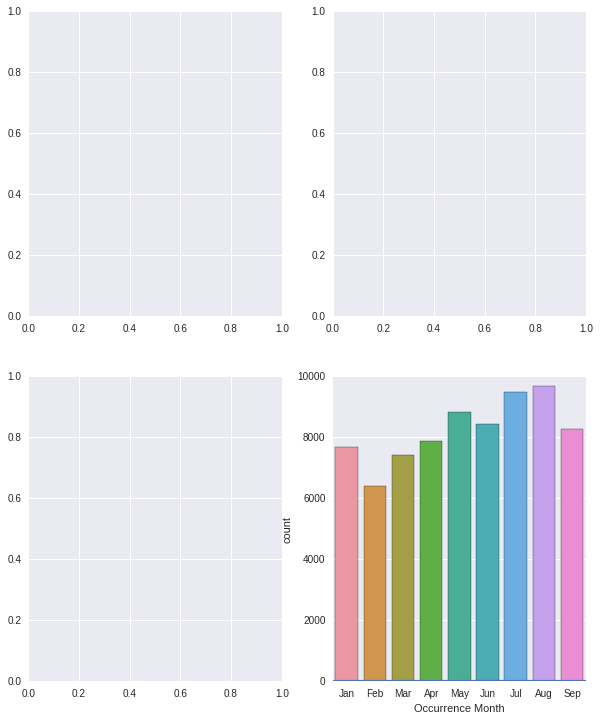

In [18]:
fix,axs = plt.subplots(2,2,figsize=(10,12))
sns.distplot(nypd_df['Occurrence Hour'].div(100),bins=24)
#sns.countplot(x='Day of Week',data=nypd_df,order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
sns.countplot(x='Occurrence Month',data=nypd_df,order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep'])
#sns.heatmap()
#    Time of day
#    Day of week
#    Week of year
#   Month of year?
#g = sns.FacetGrid(nypd_df,row='Occurrence Day',col='Occurrence Hour',margin_titles=True)
#bins = np,linspace(0,1,23)
#g.map(plt.hist, "")

In [12]:
nypd_df['Offense'].value_counts()

GRAND LARCENY                     29654
FELONY ASSAULT                    14947
ROBBERY                           12192
BURGLARY                          10776
GRAND LARCENY OF MOTOR VEHICLE     5437
RAPE                                845
MURDER                              247
Name: Offense, dtype: int64

In [5]:
nypd_df['Sector'].value_counts()

A      7938
B      7708
C      7499
D      7434
E      7127
G      6373
F      6221
H      6146
I      5000
J      3939
K      2549
M      1387
N      1099
P       741
Q       303
DOC     219
R       203
T       138
U       121
Name: Sector, dtype: int64

The NYPD is currently undertaking a Sector re-alignment program which will result in numerous
changes to sector boundaries. For example, on **May 18, 2015**, there was a re-alignment of the sectors
within the **100 and 101** precincts which resulted in a consolidation of sectors in each precinct. It is
anticipated that most, if not all precincts will undergo similar changes in the future. Users should be
cautioned that historic comparisons based on the Sector may not be valid as a result of these changes.

In [14]:
nypd_df['Borough'].value_counts()

Brooklyn         23029
Manhattan        18629
Queens           15233
Bronx            14674
Staten Island     2314
Name: Borough, dtype: int64

In [20]:
borough_pop = {'Bronx':1438159,'Brooklyn':2621793,'Manhattan':1636268,'Queens':2321580,'Staten Island':473279}

In [30]:
[float(x) for x in nypd_df.iloc[0]['Location 1'].strip('()').split(', ')]

[40.816476633, -73.90780368]

In [38]:
def loc1_to_latlon(loc):
    return [float(x) for x in loc.strip('()').split(', ')]

[lat,lon] = zip(*nypd_df['Location 1'].apply(loc1_to_latlon))
print(lat[0],lon[0])
nypd_df['Latitude']=lat
nypd_df['Longitude']=lon
#nypd_df.assign(lat,lon = lambda r: [float(x[0]) for x in r['Location 1'].str.strip('()').split(', ')])

40.816476633 -73.90780368


In [43]:
len(nypd_df['Offense'].unique())

7

In [1]:
from matplotlib.colors import ListedColormap
fig,ax = plt.subplots(figsize=(9,9))
felonies = nypd_df['Offense'].dropna().unique().tolist()
colors = ('dodgerblue','cyan','g','saddlebrown','m','r','yellow')
cmap = ListedColormap(colors[:len(felonies)])
for f in felonies:
    f_mask = (nypd_df['Offense']==f)
    plt.scatter(x=nypd_df[f_mask]['Longitude'],y=nypd_df[f_mask]['Latitude'],
                c=cmap(felonies.index(f)), s=2, alpha=.5, label=f, edgecolor=cmap(felonies.index(f)))
    #for j,x,y in zip(moment_df[team_mask]['jersey'], moment_df[team_mask]['xloc'], moment_df[team_mask]['yloc']):

#ax.scatter(x=nypd_df['Longitude'],y=nypd_df['Latitude'],c=nypd_df['Offense'],alpha=.02)
plt.legend(loc='upper left')
plt.show()

NameError: name 'plt' is not defined

In [54]:
from IPython.display import HTML

def display(m, height=600):
    '''m is a folium instance'''
    m._build_map()
    srcdoc = m.HTML.replace('"', '&quot;')
    embed = HTML('<iframe srcdoc="{0}" '
                 'style="width: 100%; height: {1}px; '
                 'border: none"></ifram>'.format(srcdoc,height))
    return embed

In [58]:
import folium

NYC_COORDS = (40.7, -74)
jan_nypd_df = nypd_df[nypd_df['Occurrence Month']=='Jan']

map = folium.Map(location=NYC_COORDS, zoom_start=10)

for each in jan_nypd_df.iterrows():
    map.simple_marker(
        location = [each[1]['Latitude'],each[1]['Longitude']],
        clustered_marker = True)

display(map)

## Next - plot data vs. time
* Time of day
* Day of week
* Week of year

## Todos:
* Find/Create a precinct-sector map. I cannot find one available publicly, but I may be able to infer it from the data alone.
